In [1]:
import matplotlib.pyplot as plt
import numpy as np
import json
import os
import statsmodels as sm
import statsmodels.formula.api as smf
import pandas as pd 

/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/compat/pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [2]:
videos_names = ['7972','7973', '7974', '7978', '7979', '7982', '7993', '8305', '8315', '8321', '8866', '8889', '8890', '8895']

In [34]:
ipe_df = pd.read_csv('IPE_data.csv')#.T
ipe_df = ipe_df.iloc[1:]
ipe_df

,Unnamed: 0,7972,7972.1,7972.2,7972.3,7972.4,7973,7973.1,7973.2,7973.3,...,8890,8890.1,8890.2,8890.3,8890.4,8895,8895.1,8895.2,8895.3,8895.4
1,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000
2,2,0.020000,0.020000,0.053333,0.126667,0.146667,0.000000,0.000000,0.000000,0.073333,...,NaN,NaN,NaN,NaN,NaN,0,0.000000,0.193333,0.426667,0.573333
3,3,0.146667,0.106667,0.163333,0.243333,0.310000,0.000000,0.000000,0.013333,0.066667,...,0.000000,0.000000,0.000000,0.016667,0.036667,0,0.000000,0.260000,0.543333,0.600000
4,4,0.364444,0.348889,0.355556,0.442222,0.517778,0.013333,0.020000,0.064444,0.115556,...,NaN,NaN,NaN,NaN,NaN,0,0.000000,0.406667,0.720000,0.840000
5,5,1.000000,1.000000,1.000000,1.000000,1.000000,0.095000,0.128333,0.123333,0.206667,...,0.087500,0.076667,0.123333,0.204167,0.236667,0,0.056667,0.526667,0.845000,0.910000
6,6,1.000000,1.000000,1.000000,1.000000,1.000000,0.180000,0.184000,0.208000,0.304000,...,0.164667,0.145333,0.189333,0.273333,0.345333,NaN,NaN,NaN,NaN,NaN
7,7,1.000000,1.000000,1.000000,1.000000,1.000000,0.394444,0.336667,0.413333,0.434444,...,0.185556,0.206667,0.218333,0.327222,0.403333,NaN,NaN,NaN,NaN,NaN
8,8,1.000000,1.000000,1.000000,1.000000,1.000000,0.358095,0.380000,0.375238,0.499048,...,0.204762,0.224762,0.243810,0.365714,0.430952,NaN,NaN,NaN,NaN,NaN
9,9,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,...,0.274167,0.240833,0.351250,0.534583,0.565000,NaN,NaN,NaN,NaN,NaN
10,10,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,...,0.343704,0.317778,0.423333,0.550370,0.606667,NaN,NaN,NaN,NaN,NaN


In [9]:
for i in range(1,71,5):
    video_name = ipe_df.columns[i]
#     print(video_name)
#     print(ipe_df.columns[i+4])
#     print(ipe_df.columns[i])
    ipe_vid_df = ipe_df.iloc[:,i:i+5]

#     display(ipe_vid_df)
#     print(ipe_vid_df.columns)
    fig, ax = plt.subplots(figsize=(8,6))

    # Plot the data
    ipe_vid_df.plot(ax=ax, style='.-')
    ax.legend(labels=['0.001', '0.01', '0.05', '0.1', '0.125'])
    ax.set_xlabel('Tower Height (blocks)')
    ax.set_ylabel('Instability Score, P(fall)')
    ax.set_yticks([0,0.2,0.4,0.6,0.8,1.0])
    ax.set_xticks(range(1,ipe_df[ipe_df.columns[i]].count()+1))
    ax.set_ylim(-0.1,1.1)
    ax.set_title(f'Instability Score with Increasing Tower Height ({video_name})')
#     fig.savefig(f'{video_name}_ipe.png')
#     plt.close(fig)  # close the figure to free memory

In [5]:
# ipe_df.columns = ipe_df.iloc[0]
# ipe_df = ipe_df[1:]
# ipe_df

In [6]:
ipe7972_df=ipe_df.iloc[:,16:16+5]
ipe7972_df

,7978,7978.1,7978.2,7978.3,7978.4
1,0.0,0.0,0.000000,0.000000,0.000000
2,0.0,0.0,0.000000,0.053333,0.033333
3,0.0,0.0,0.070000,0.226667,0.353333
4,0.0,0.0,0.057778,0.255556,0.364444
5,0.0,0.0,0.076667,0.310000,0.421667
6,0.0,0.0,0.053333,0.284000,0.458667
7,0.0,0.0,0.135556,0.493333,0.711111
8,0.0,0.0,0.122857,0.600000,0.700000
9,0.0,0.0,0.123333,0.560833,0.710833
10,0.0,0.0,0.129630,0.588889,0.682963


,8895,8895.1,8895.2,8895.3,8895.4
1,0,0.000000,0.000000,0.000000,0.000000
2,0,0.000000,0.193333,0.426667,0.573333
3,0,0.000000,0.260000,0.543333,0.600000
4,0,0.000000,0.406667,0.720000,0.840000
5,0,0.056667,0.526667,0.845000,0.910000


Text(0.5, 1.0, 'Instability Score with Increasing Tower Height (8895)')

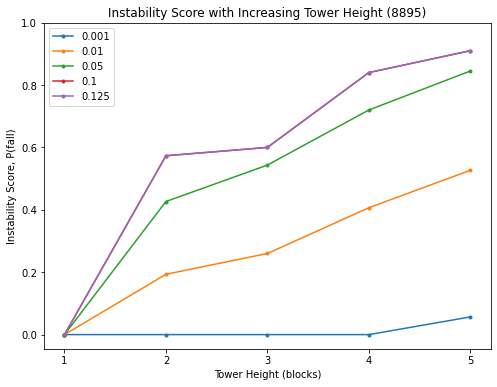

In [31]:
ipe7972_df=ipe_df.iloc[:5,66:66+5]
display(ipe7972_df)
name_val = 8895
fig, ax = plt.subplots(figsize=(8,6))
ipe7972_df.plot(ax=ax, style='.-')
ax.plot([1,2,3,4,5], [0, 0.573333, 0.600000, 0.840000, 0.910000],'.-')
ax.legend(labels=['0.001', '0.01', '0.05', '0.1', '0.125'])
ax.set_xlabel('Tower Height (blocks)')
ax.set_ylabel('Instability Score, P(fall)')
ax.set_yticks([0,0.2,0.4,0.6,0.8,1.0])
ax.set_xticks(range(1,ipe7972_df[str(name_val)].count()+1))
ax.set_title(f'Instability Score with Increasing Tower Height ({name_val})')
# fig.savefig(f'{name_val}_ipe.png')
# plt.close(fig)

In [40]:
ipe7972_df=ipe_df.iloc[:,56:56+5]
display(ipe7972_df)
name_val = 8886
fig, ax = plt.subplots(figsize=(8,6))
ipe7972_df.plot(ax=ax, style='.-')
# ax.plot([1,2,3,4,5], [0, 0.573333, 0.600000, 0.840000, 0.910000],'.-')
ax.legend(labels=['0.001', '0.01', '0.05', '0.1', '0.125'])
ax.set_xlabel('Tower Height (blocks)')
ax.set_ylabel('Instability Score, P(fall)')
ax.set_yticks([0,0.2,0.4,0.6,0.8,1.0])
ax.set_xticks(range(1,ipe7972_df[str(name_val)].count()+1))
ax.set_title(f'Instability Score with Increasing Tower Height ({name_val})')
fig.savefig(f'{name_val}_ipe.png')
plt.close(fig)

,8886,8886.1,8886.2,8886.3,8886.4
1,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.026667,0.046667,0.100000
3,0.006667,0.000000,0.030000,0.106667,0.130000
4,0.010000,0.088889,0.131111,0.164444,0.215556
5,0.017500,0.146667,0.133333,0.243333,0.326667
6,0.026000,0.201333,0.218667,0.377333,0.518667
7,0.000556,0.196667,0.312222,0.406667,0.538889
8,0.002381,0.137143,0.243810,0.522857,0.597143
9,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Instability Score with Increasing Tower Height (7972)')

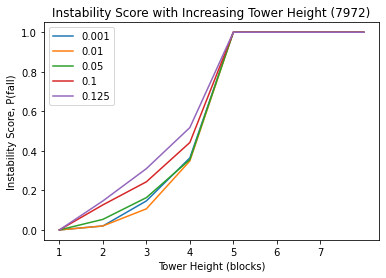

In [8]:
ipe7972_df=ipe_df.iloc[:,1:6]
ax = ipe7972_df.plot()
ax.legend(labels=['0.001', '0.01', '0.05', '0.1', '0.125'])
ax.set_xlabel('Tower Height (blocks)')
ax.set_ylabel('Instability Score, P(fall)')
ax.set_yticks([0,0.2,0.4,0.6,0.8,1.0])
ax.set_xticks(range(1,ipe7972_df[videos_names[0]].count()))
ax.set_title(f'Instability Score with Increasing Tower Height ({videos_names[0]})')
